In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [243]:
df =pd.read_csv("../Dataset/india_cases.csv",index_col='Date',parse_dates=True)

C:\Users\sneha\AppData\Local\Temp\ipykernel_24852\2361962758.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df =pd.read_csv("../Dataset/india_cases.csv",index_col='Date',parse_dates=True)


<Axes: xlabel='Date'>

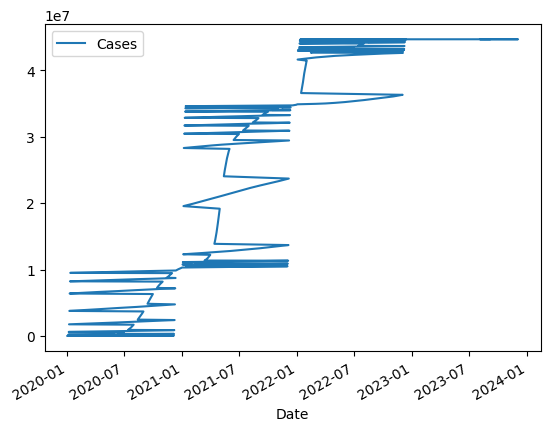

In [244]:
df.plot()

In [245]:
dfr=df.resample('D').ffill()

In [246]:
dfr.head()

,Cases
Date,
2020-01-02,1
2020-01-03,3
2020-01-04,1998
2020-01-05,37257
2020-01-06,198370


In [247]:
dfr.index.freq='D'

<Axes: xlabel='Date'>

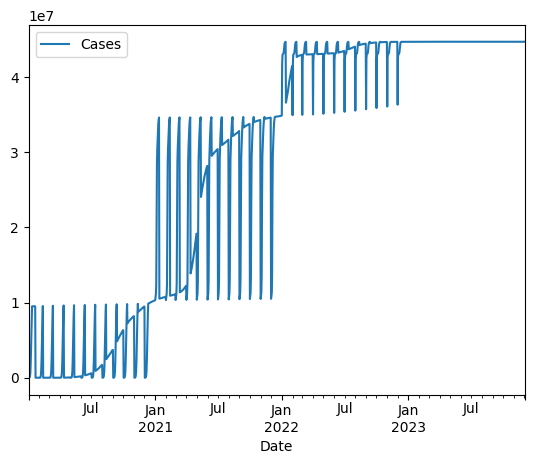

In [248]:
dfr.plot()

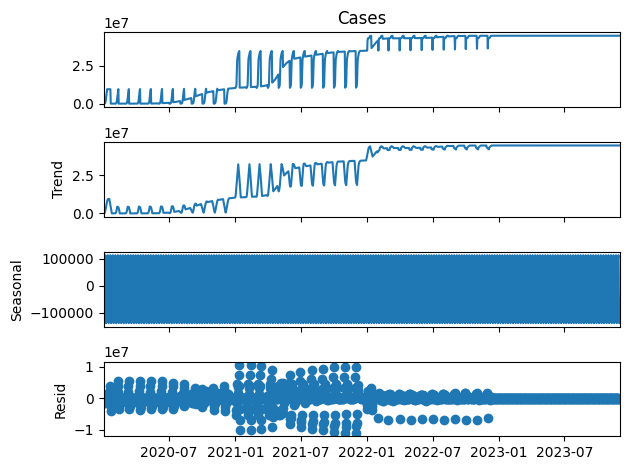

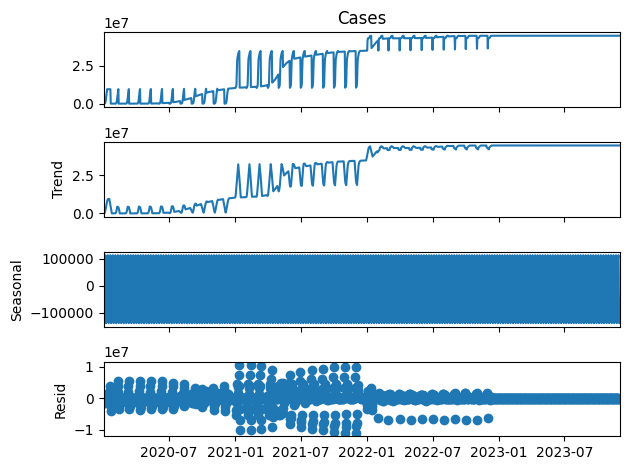

In [249]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(dfr['Cases'])
results.plot()
     

In [250]:
len(dfr)

1431

In [251]:
80*1431

114480

In [252]:
0.8*1431

1144.8

In [253]:
# train = dfr.iloc[:1144]
# test = dfr.iloc[1144:]
     

In [254]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [255]:
# dfr.head(),dfr.tail()

In [256]:
def scaleandpreparedata(dfr):
    n=len(dfr)
    p=int(n*0.8)
    train=dfr.iloc[:p]
    test=dfr.iloc[p:]

    scaler = MinMaxScaler()
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)
    return (scaled_train,scaled_test,test,scaler)

In [257]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [258]:
# n_input = 12
# n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=32)

     

In [259]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [260]:
# define model
def createModelandTrainModel(scaled_train,n_input,n_features):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')


    # n_input = 12
    # n_features = 1
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=32)
    model.fit(generator,epochs=100)
    return model



In [261]:
# model.summary()

In [262]:
# model.fit(generator,epochs=100)

In [263]:
# last_train_batch = scaled_train[-12:]

In [264]:
# last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [265]:
# model.predict(last_train_batch)

In [266]:
# scaled_test[0]

In [267]:
def functionforprediction(dfr,n_input):
    n_features=1
    test_predictions = []
    (scaled_train,scaled_test,testp,scaler)=scaleandpreparedata(dfr)
    model=createModelandTrainModel(scaled_train,n_input,n_features)
    first_eval_batch = scaled_train[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(testp)):
    
    # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
        test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    return (true_predictions,testp)

In [268]:
(true_predictions,test)=functionforprediction(dfr,12)

Epoch 1/100


C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6928

C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4921
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0310
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0135
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0114
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0121
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0123
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0104
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0104
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0083
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0077
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0077
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0085
Epoch 15/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065
Ep

In [ ]:
# test.head()

,Cases,Predictions
Date,,
2023-02-19,44686263,45611012
2023-02-20,44686358,46258393
2023-02-21,44686483,46755859
2023-02-22,44686676,47126376
2023-02-23,44686842,47436247


In [ ]:
# test_predictions

[array([0.99163836], dtype=float32),
 array([0.9875337], dtype=float32),
 array([0.9844264], dtype=float32),
 array([0.98184854], dtype=float32),
 array([0.97953826], dtype=float32),
 array([0.9774358], dtype=float32),
 array([0.9755269], dtype=float32),
 array([0.9737687], dtype=float32),
 array([0.9721502], dtype=float32),
 array([0.97057897], dtype=float32),
 array([0.9690466], dtype=float32),
 array([0.96756256], dtype=float32),
 array([0.9661257], dtype=float32),
 array([0.9647778], dtype=float32),
 array([0.96351296], dtype=float32),
 array([0.9623235], dtype=float32),
 array([0.9612014], dtype=float32),
 array([0.96013755], dtype=float32),
 array([0.95912904], dtype=float32),
 array([0.95817167], dtype=float32),
 array([0.95726275], dtype=float32),
 array([0.95639914], dtype=float32),
 array([0.95557743], dtype=float32),
 array([0.95479995], dtype=float32),
 array([0.95406234], dtype=float32),
 array([0.9533567], dtype=float32),
 array([0.95268285], dtype=float32),
 array([0.952

In [ ]:

test['Predictions'] = true_predictions.astype(int)


C:\Users\sneha\AppData\Local\Temp\ipykernel_24852\3360722217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions.astype(int)


In [ ]:
test.head()

,Cases,Predictions
Date,,
2023-02-19,44686263,44314719
2023-02-20,44686358,44131288
2023-02-21,44686483,43992427
2023-02-22,44686676,43877228
2023-02-23,44686842,43773985


<Axes: xlabel='Date'>

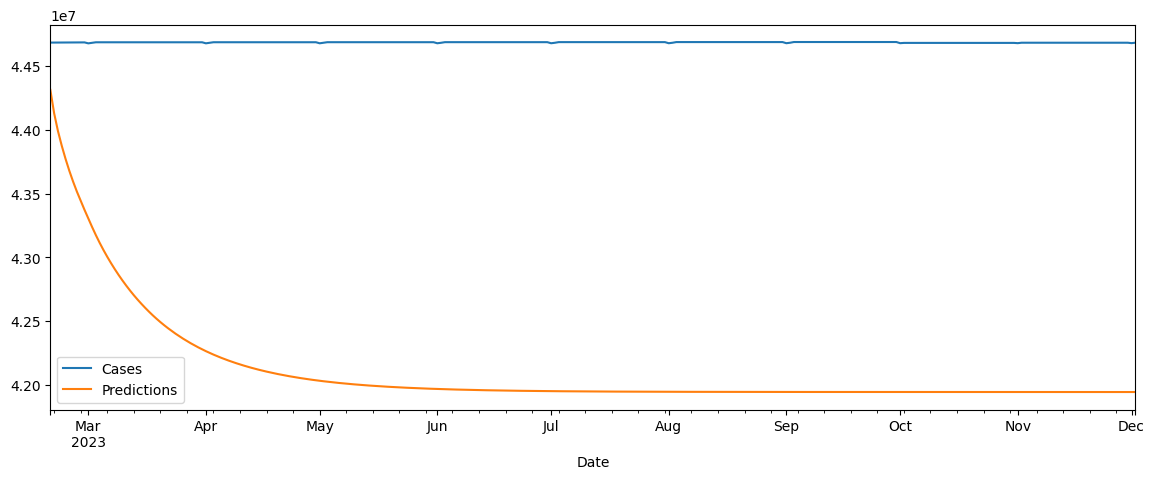

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
testm=test.resample('M').sum()

C:\Users\sneha\AppData\Local\Temp\ipykernel_24852\1631276972.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  testm=test.resample('M').sum()


<Axes: xlabel='Date'>

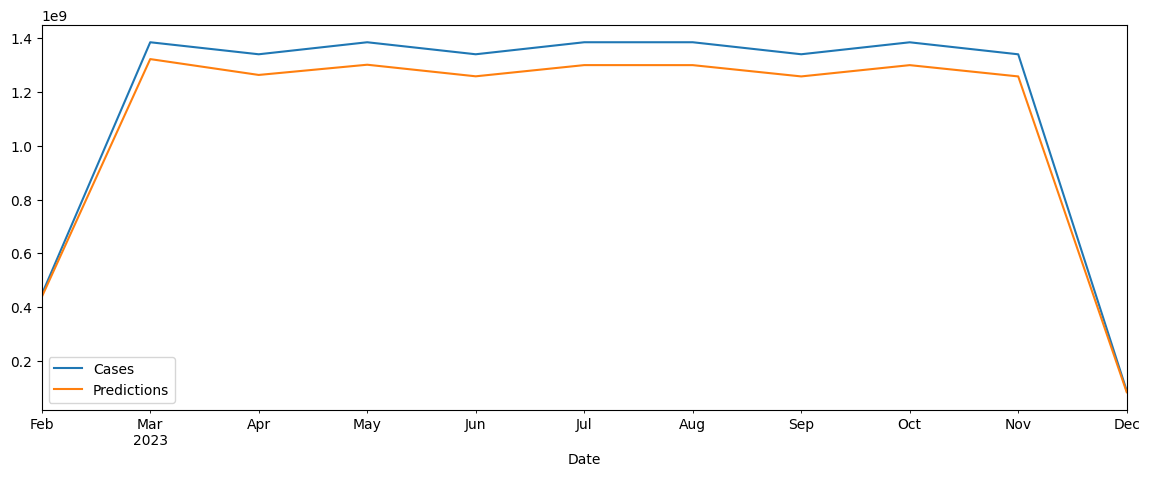

In [ ]:
testm.plot(figsize=(14,5))